## Caviglia Sara - Bachelor's Degree in Computer Science
# Analizzare e Interpretare i dati usando il Clustering Gerarchico
### Analyze and Interpret data using Hierchical Clustering

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
canzoni = pd.read_csv("canzoni.csv")
canzoni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

In [ ]:
canzoni.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


After I've imported my dataset, I need to clean my data, in order to work on it.

In [ ]:
canzoni.drop(columns=['id', 'release_date'], inplace=True)

In [ ]:
canzoni = canzoni.sort_values(by='popularity', ascending=False)
column_names = ['name', 'artists', 'duration_ms', 'year', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode', 'key', 'explicit']
canzoni = canzoni.drop_duplicates(subset=column_names, keep='first')

In [ ]:
canzoni.duplicated()

16539     False
111992    False
165408    False
134148    False
137845    False
          ...  
73562     False
73563     False
73564     False
25486     False
104732    False
Length: 167367, dtype: bool

In [ ]:
canzoni['artists'] = canzoni['artists'].str.replace("['", "")
canzoni['artists'] = canzoni['artists'].str.replace("']", "")

In [ ]:
canzoni = canzoni.sort_values(by='name', ascending=True)
canzoni.reset_index(drop=True, inplace=True)
canzoni.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,!Que Vida! - Mono Version,Love,220560,1966,0.525000,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,"""40""",U2,157840,1983,0.228000,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,"""40"" - Live",U2,226200,1983,0.099800,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,"""40"" - Remastered 2008",U2,157667,1983,0.185000,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,"""45""",The Gaslight Anthem,202493,2012,0.000696,0.315,0.970,0.00000,0.277,-4.709,0.1020,178.068,0.423,1,8,48,0


What are the possible values for my columns?

In [ ]:
print("year: " + str(canzoni["year"].min()) + " - " + str(canzoni["year"].max()))
print("acousticness: " + str(canzoni["acousticness"].min()) + " - " + str(canzoni["acousticness"].max()))
print("danceability: " + str(canzoni["danceability"].min()) + " - " + str(canzoni["danceability"].max()))
print("energy: " + str(canzoni["energy"].min()) + " - " + str(canzoni["energy"].max()))
print("valence: " + str(canzoni["valence"].min()) + " - " + str(canzoni["valence"].max()))
print("mode: " + str(canzoni["mode"].min()) + " - " + str(canzoni["mode"].max()))
print("key: " + str(canzoni["key"].min()) + " - " + str(canzoni["key"].max()))
print("popularity: " + str(canzoni["popularity"].min()) + " - " + str(canzoni["popularity"].max()))
print("explicit: " + str(canzoni["explicit"].min()) + " - " + str(canzoni["explicit"].max()))
print("duration_ms: " + str(canzoni["duration_ms"].min()) + " - " + str(canzoni["duration_ms"].max()))
print("instrumentalness: " + str(canzoni["instrumentalness"].min()) + " - " + str(canzoni["instrumentalness"].max()))
print("liveness " + str(canzoni["liveness"].min()) + " - " + str(canzoni["liveness"].max()))
print("loudness: " + str(canzoni["loudness"].min()) + " - " + str(canzoni["loudness"].max()))
print("speechiness: "+ str(canzoni["speechiness"].min()) + " - " + str(canzoni["speechiness"].max()))
print("tempo: " + str(canzoni["tempo"].min()) + " - " + str(canzoni["tempo"].max()))

year: 1921 - 2020
acousticness: 0.0 - 0.996
danceability: 0.0 - 0.988
energy: 0.0 - 1.0
valence: 0.0 - 1.0
mode: 0 - 1
key: 0 - 11
popularity: 0 - 100
explicit: 0 - 1
duration_ms: 5108 - 5403500
instrumentalness: 0.0 - 1.0
liveness 0.0 - 1.0
loudness: -60.0 - 3.855
speechiness: 0.0 - 0.969
tempo: 0.0 - 244.091


I now want to classify my tracks in genres: I used some of my knowledge (and a fair amount of Internet) to understand which features are important to define a genre. After I've created a function, I apply it to my data and I verify how many songs are in each category.

In [ ]:
def genreClassification(row):
    if row['acousticness'] >= 0.6 and row['energy'] <= 0.4 and row['instrumentalness'] >= 0.3 and row['speechiness'] <= 0.3:
        return 'Acoustic/Folk'
    elif row['danceability'] >= 0.5 and row['energy'] >= 0.5 and row['valence'] >= 0.5 and row['popularity'] >= 70 and 90 <= row['tempo'] <= 120:
        return 'Pop'
    elif row['energy'] >= 0.6 and -10 <= row['loudness'] <= 0 and 100 <= row['tempo'] <= 140 and row['acousticness'] <= 0.3:
        return 'Rock'
    elif row['speechiness'] >= 0.3 and row['danceability'] >= 0.5 and row['energy'] >= 0.5 and -10 <= row['loudness'] <= 0 and 80 <= row['tempo'] <= 120:
        return 'Hip-Hop/Rap'
    elif row['danceability'] >= 0.7 and row['energy'] >= 0.7 and 120 <= row['tempo'] <= 150 and row['valence'] >= 0.5 and 0.2 <= row['instrumentalness'] <= 0.5:
        return 'Electronic/Dance'
    elif row['acousticness'] >= 0.5 and row['instrumentalness'] >= 0.5 and row['speechiness'] <= 0.3 and 0.2 <= row['energy'] <= 0.6:
        return 'Jazz'
    elif row['acousticness'] >= 0.7 and row['instrumentalness'] >= 0.8 and row['energy'] <= 0.3 and row['speechiness'] <= 0.1:
        return 'Classical'
    else:
        return 'Other'


In [ ]:
canzoni['genre'] = canzoni.apply(lambda row: genreClassification(row), axis=1)

In [ ]:
canzoni['genre'].value_counts()

genre
Other               123884
Acoustic/Folk        19784
Rock                 19068
Jazz                  2794
Hip-Hop/Rap           1011
Pop                    787
Electronic/Dance        39
Name: count, dtype: int64

Since the 'Electronic/Dance' genre is not populated (we can see that the other genres have a lot more values), we discard it.

In [ ]:
canzoni = canzoni[canzoni['genre'] != 'Electronic/Dance']

In [ ]:
canzoni['genre'].value_counts()

genre
Other            123884
Acoustic/Folk     19784
Rock              19068
Jazz               2794
Hip-Hop/Rap        1011
Pop                 787
Name: count, dtype: int64

We want to have a number of tracks for each genre that can be compared to the others: we choose to sample 1000 tracks per genre (apart from 'Pop', which will have 7878 tracks). This will help us understand the result of the clustering: the clusters will be based on data and not on the amount of it.

In [ ]:
def sample(df, genre, n):
    return df[df['genre'] == genre].sample(n)

canzoni_sample = pd.concat([sample(canzoni, 'Other', 1000), sample(canzoni, 'Acoustic/Folk', 1000), sample(canzoni, 'Rock', 1000), sample(canzoni, 'Jazz', 1000), canzoni[canzoni['genre'] == 'Pop'], canzoni[canzoni['genre'] == 'Hip-Hop/Rap']])
canzoni_sample['genre'].value_counts()

genre
Hip-Hop/Rap      1011
Other            1000
Acoustic/Folk    1000
Rock             1000
Jazz             1000
Pop               787
Name: count, dtype: int64

In [ ]:
del canzoni
canzoni = canzoni_sample
canzoni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5798 entries, 89231 to 163226
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5798 non-null   object 
 1   artists           5798 non-null   object 
 2   duration_ms       5798 non-null   int64  
 3   year              5798 non-null   int64  
 4   acousticness      5798 non-null   float64
 5   danceability      5798 non-null   float64
 6   energy            5798 non-null   float64
 7   instrumentalness  5798 non-null   float64
 8   liveness          5798 non-null   float64
 9   loudness          5798 non-null   float64
 10  speechiness       5798 non-null   float64
 11  tempo             5798 non-null   float64
 12  valence           5798 non-null   float64
 13  mode              5798 non-null   int64  
 14  key               5798 non-null   int64  
 15  popularity        5798 non-null   int64  
 16  explicit          5798 non-null   int64  

We use only some features for the clustering, meaning the features we used in our function to annotate genres.

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, set_link_color_palette
import scipy.cluster.hierarchy as sch

# Compute the linkage matrix
canzoni_cluster = canzoni.drop(columns=['name', 'artists', 'duration_ms', 'year', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit', 'genre'])
linkage_matrix = linkage(canzoni_cluster, method='ward')

We start creating a clustering with 6 clusters.

In [ ]:
# Obtain 6 clusters using `fcluster`
cluster_labels = fcluster(linkage_matrix, t=6, criterion='maxclust')

# Add the cluster labels to the DataFrame
canzoni['Cluster'] = cluster_labels

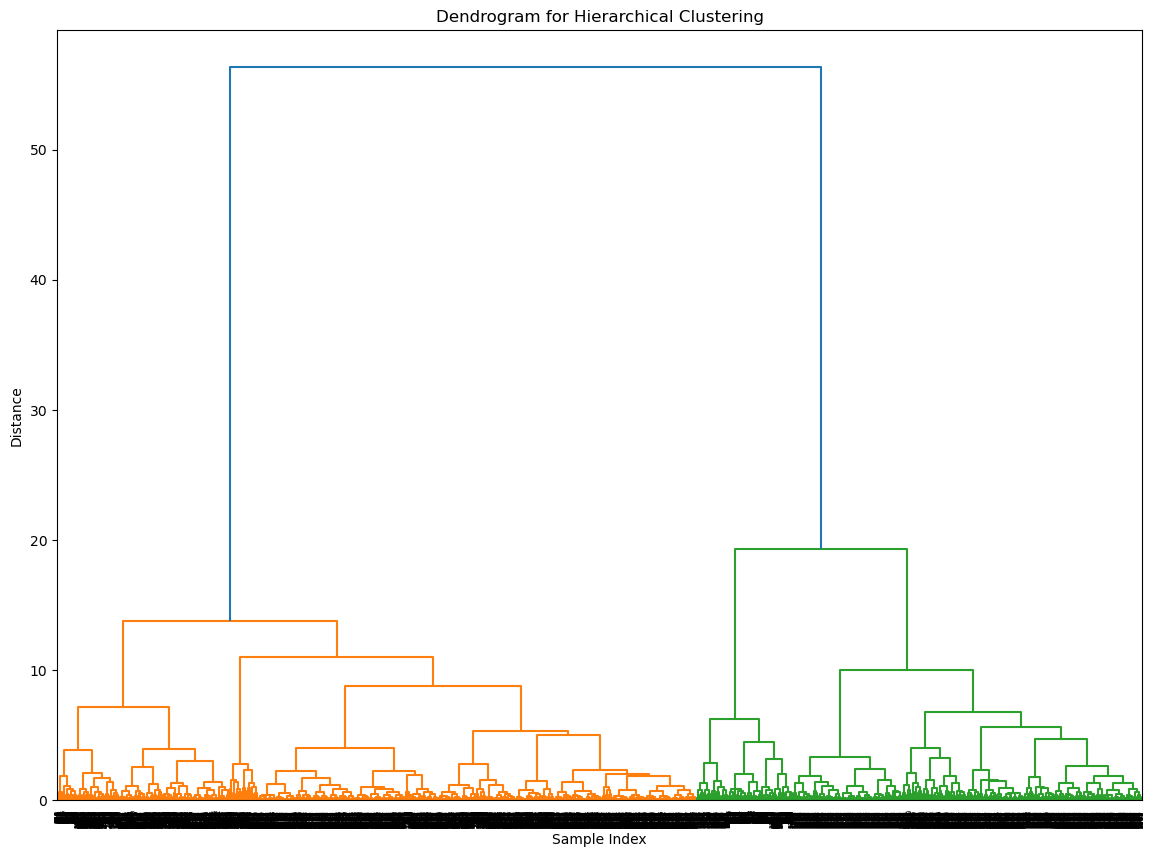

In [ ]:
plt.figure(figsize=(14, 10))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

How are the genres distributed in the clusters?

In [ ]:
genre_cluster_crosstab = pd.crosstab(canzoni['genre'], canzoni['Cluster'])
print(genre_cluster_crosstab)

Cluster          1    2    3    4    5    6
genre                                      
Acoustic/Folk    0    0    0  156  586  258
Hip-Hop/Rap    303    1  665   40    0    2
Jazz             0    0    0    1    1  998
Other          357   40  269  312    0   22
Pop            199    7  580    1    0    0
Rock            64  101  835    0    0    0


In [ ]:
# Normalize the crosstab by the total counts for each genre to get percentages
genre_cluster_percentage = genre_cluster_crosstab.div(genre_cluster_crosstab.sum(axis=1), axis=0) * 100

# Display the percentage table
print(genre_cluster_percentage)

Cluster                1          2          3          4     5          6
genre                                                                     
Acoustic/Folk   0.000000   0.000000   0.000000  15.600000  58.6  25.800000
Hip-Hop/Rap    29.970326   0.098912  65.776459   3.956479   0.0   0.197824
Jazz            0.000000   0.000000   0.000000   0.100000   0.1  99.800000
Other          35.700000   4.000000  26.900000  31.200000   0.0   2.200000
Pop            25.285896   0.889454  73.697586   0.127065   0.0   0.000000
Rock            6.400000  10.100000  83.500000   0.000000   0.0   0.000000


genre    Acoustic/Folk  Hip-Hop/Rap       Jazz      Other        Pop  \
Cluster                                                                
1             0.000000    32.827736   0.000000  38.678223  21.560130   
2             0.000000     0.671141   0.000000  26.845638   4.697987   
3             0.000000    28.309919   0.000000  11.451682  24.691358   
4            30.588235     7.843137   0.196078  61.176471   0.196078   
5            99.829642     0.000000   0.170358   0.000000   0.000000   
6            20.156250     0.156250  77.968750   1.718750   0.000000   

genre         Rock  
Cluster             
1         6.933911  
2        67.785235  
3        35.547041  
4         0.000000  
5         0.000000  
6         0.000000  


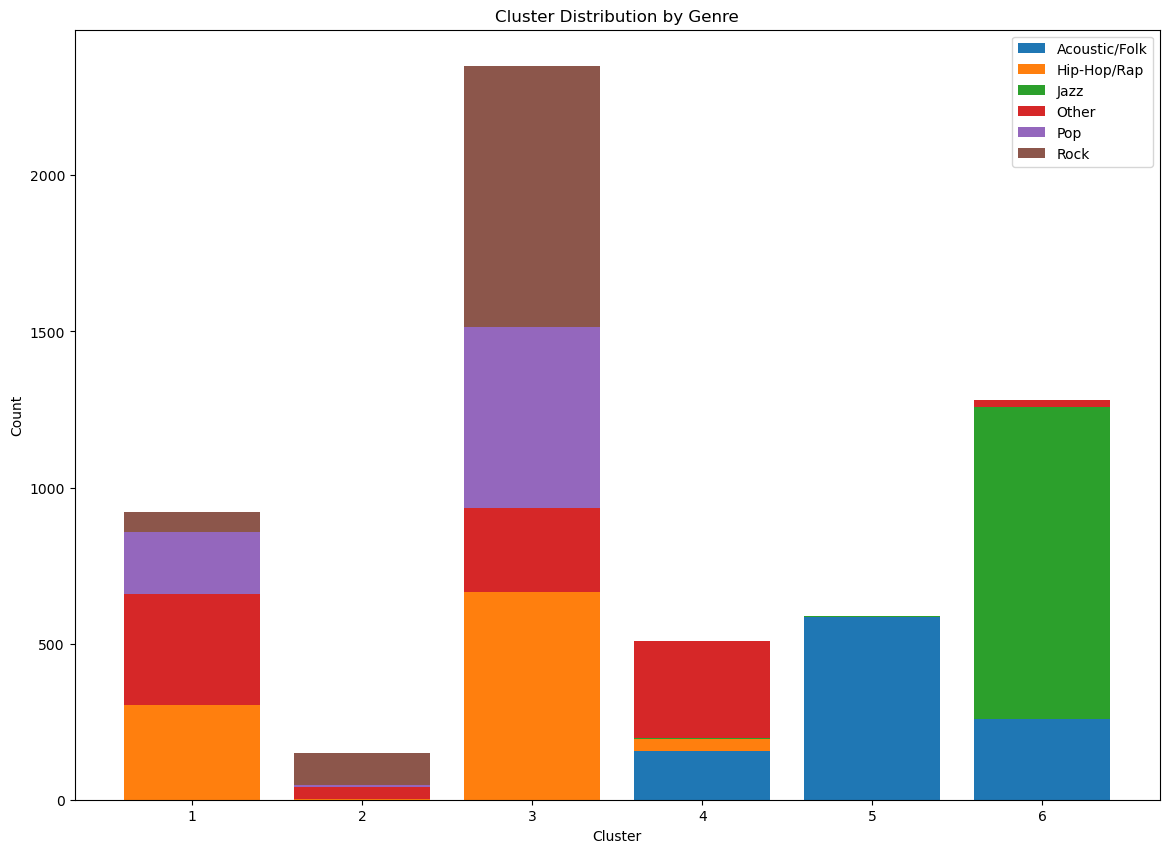

In [ ]:
# Normalize the crosstab by the total counts for each cluster to get percentages
cluster_genre_crosstab = pd.crosstab(canzoni['Cluster'], canzoni['genre'])
cluster_genre_percentage = cluster_genre_crosstab.div(cluster_genre_crosstab.sum(axis=1), axis=0) * 100

# Display the percentage table
print(cluster_genre_percentage)

# Plot the data
plt.figure(figsize=(14, 10))
bottom = np.zeros(len(cluster_genre_crosstab.index))
for genre in cluster_genre_crosstab.columns:
    plt.bar(cluster_genre_crosstab.index, cluster_genre_crosstab[genre], bottom=bottom, label=genre)
    bottom += cluster_genre_crosstab[genre]

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution by Genre')
plt.legend()
plt.show()

Now we do another clustering, using 10 clusters.

In [ ]:
# Obtain 6 clusters using `fcluster`
cluster_labels = fcluster(linkage_matrix, t=10, criterion='maxclust')

# Add the cluster labels to the DataFrame
canzoni['Cluster'] = cluster_labels

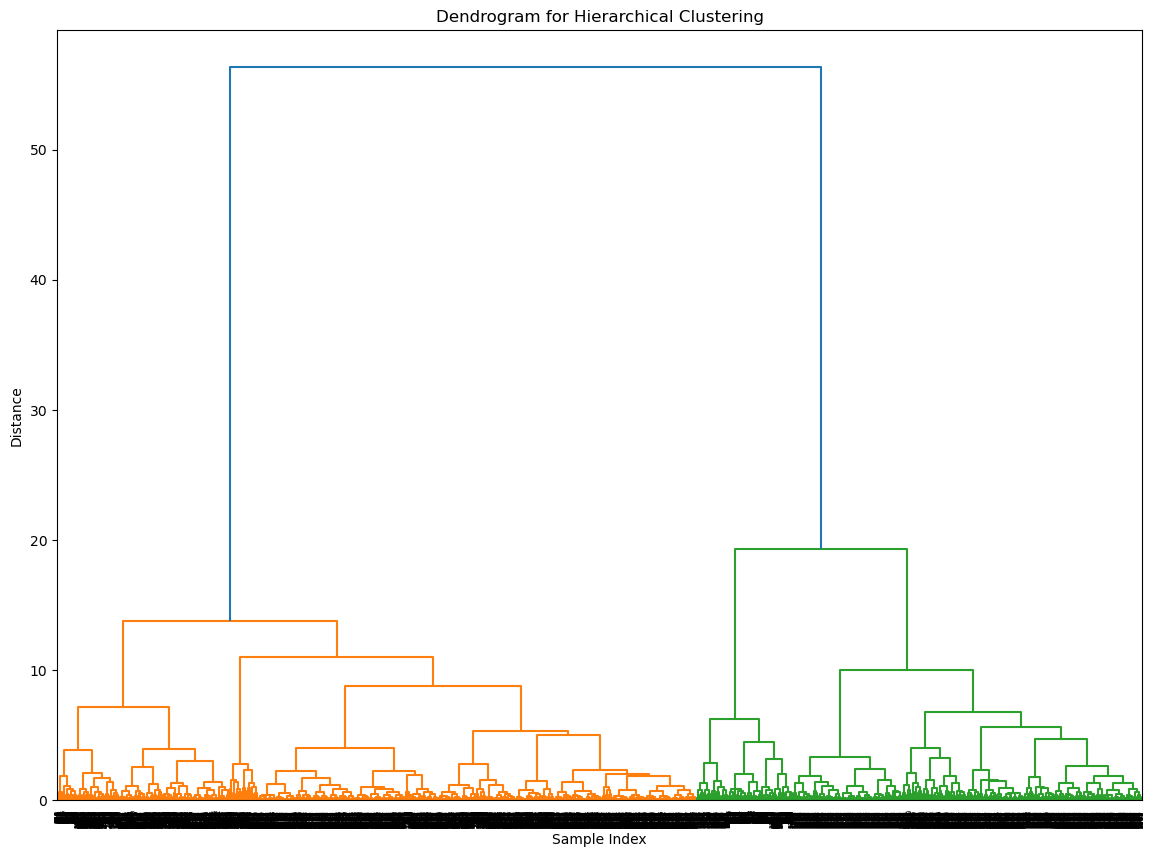

In [ ]:


plt.figure(figsize=(14, 10))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
genre_cluster_crosstab = pd.crosstab(canzoni['genre'], canzoni['Cluster'])
print(genre_cluster_crosstab)

Cluster         1    2    3    4    5    6    7    8    9    10
genre                                                          
Acoustic/Folk    0    0    0    0    0  156    0  586   24  234
Hip-Hop/Rap     72  231    1  392  273    0   40    0    2    0
Jazz             0    0    0    0    0    1    0    1  301  697
Other          224  133   40   70  199   11  301    0   18    4
Pop             34  165    7  326  254    0    1    0    0    0
Rock             0   64  101  183  652    0    0    0    0    0


genre    Acoustic/Folk  Hip-Hop/Rap       Jazz      Other        Pop  \
Cluster                                                                
1             0.000000    21.818182   0.000000  67.878788  10.303030   
2             0.000000    38.954469   0.000000  22.428331  27.824621   
3             0.000000     0.671141   0.000000  26.845638   4.697987   
4             0.000000    40.370752   0.000000   7.209063  33.573635   
5             0.000000    19.811321   0.000000  14.441219  18.432511   
6            92.857143     0.000000   0.595238   6.547619   0.000000   
7             0.000000    11.695906   0.000000  88.011696   0.292398   
8            99.829642     0.000000   0.170358   0.000000   0.000000   
9             6.956522     0.579710  87.246377   5.217391   0.000000   
10           25.026738     0.000000  74.545455   0.427807   0.000000   

genre         Rock  
Cluster             
1         0.000000  
2        10.792580  
3        67.785235  
4        18.846550  
5        

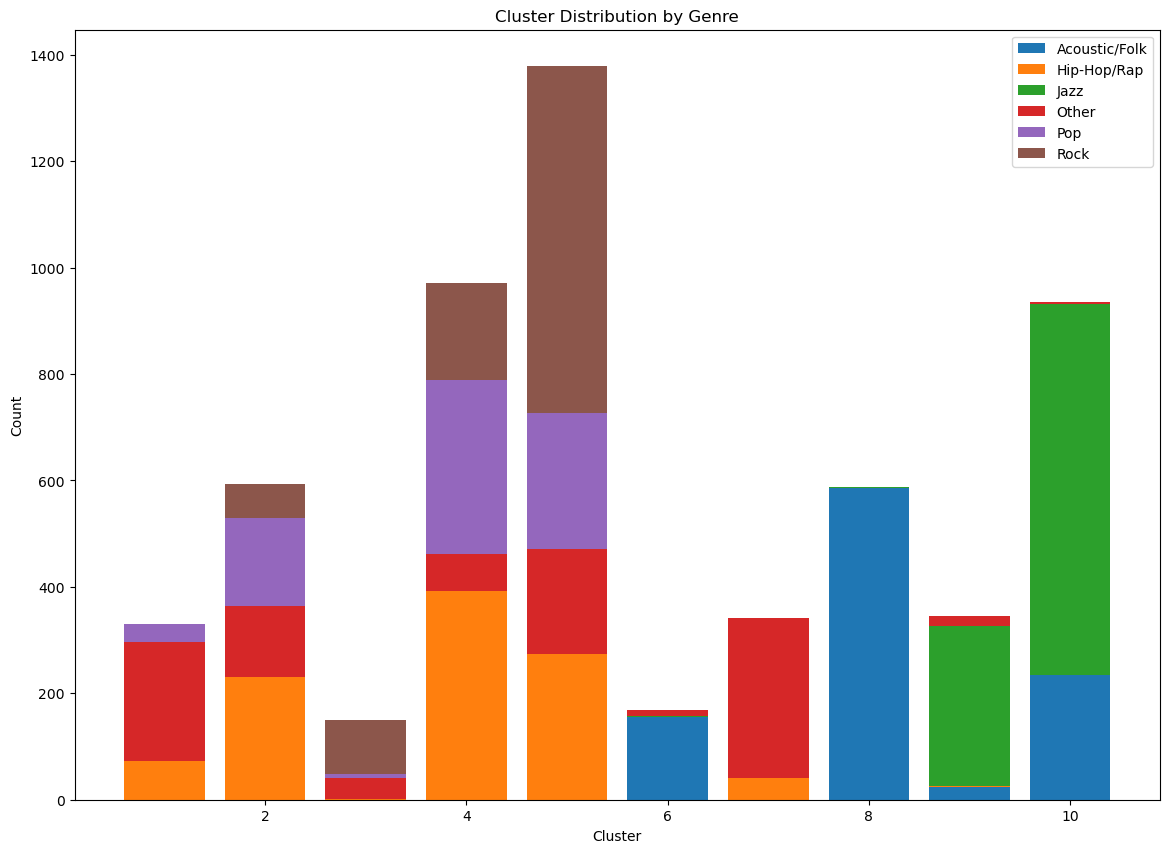

In [ ]:
# Normalize the crosstab by the total counts for each cluster to get percentages
cluster_genre_crosstab = pd.crosstab(canzoni['Cluster'], canzoni['genre'])
cluster_genre_percentage = cluster_genre_crosstab.div(cluster_genre_crosstab.sum(axis=1), axis=0) * 100

# Display the percentage table
print(cluster_genre_percentage)

# Plot the data
plt.figure(figsize=(14, 10))
bottom = np.zeros(len(cluster_genre_crosstab.index))
for genre in cluster_genre_crosstab.columns:
    plt.bar(cluster_genre_crosstab.index, cluster_genre_crosstab[genre], bottom=bottom, label=genre)
    bottom += cluster_genre_crosstab[genre]

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution by Genre')
plt.legend()
plt.show()